# Orientation analysis

This is an example of a orientation analysis using .TFBS from motif sites.

## Create CombObj and fill it with .TFBS from motif scanning

In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

In [2]:
C.TFBS_from_motifs(regions="../data/GM12878_hg38_chr4_ATAC_peaks.bed", 
                   motifs="../data/HOCOMOCOv11_HUMAN_motifs.txt",
                   genome="../data/hg38_chr4_masked.fa.gz", 
                   threads=8)

For this analysis, we will run count_within() with the stranded option turned on:

In [3]:
C.count_within(stranded=True, threads=8)
C.market_basket()

## Analyze preferential orientation of motifs

First, we create a directionality analysis for the rules found:

In [4]:
df = C.analyze_orientation()

INFO: Rules are symmetric - scenarios counted are: ['same', 'opposite']


In [5]:
df.head()

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
"(PATZ1, SP3)",PATZ1,SP3,579,0.732297,0.267703,0.328518,5.151864e-29
"(PATZ1, SP1)",PATZ1,SP1,574,0.724739,0.275261,0.317828,4.837210e-27
"(SP3, SP4)",SP3,SP4,464,0.745690,0.254310,0.347458,3.511493e-26
"(PATZ1, SP2)",PATZ1,SP2,698,0.693410,0.306590,0.273523,1.619233e-24
"(SP2, SP3)",SP2,SP3,882,0.670068,0.329932,0.240513,5.438947e-24


We can subset these on pvalue and number of sites:

In [6]:
selected = df[(df["pvalue"] < 0.01) & (df["TF1_TF2_count"] > 50)]

In [7]:
#Number of TF pairs with significant differences in orientation
selected.shape[0]

403

## Visualization of orientation preference

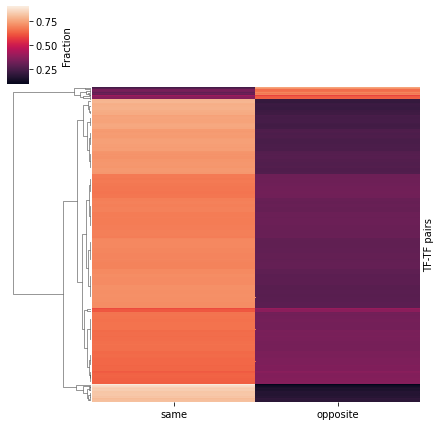

In [8]:
_ = selected.plot_heatmap()

We can select the subsets by investigating the selected pairs:

In [9]:
selected.sort_values("same").head(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
"(PATZ1, ZFX)",PATZ1,ZFX,62,0.241935,0.758065,0.364958,0.000048
"(SP1, ZFX)",SP1,ZFX,66,0.272727,0.727273,0.321412,0.000222
"(ASCL1, WT1)",ASCL1,WT1,51,0.274510,0.725490,0.318891,0.001279
"(MYF6, ZBTB17)",MYF6,ZBTB17,74,0.297297,0.702703,0.286665,0.000488
"(EGR2, MYF6)",EGR2,MYF6,65,0.307692,0.692308,0.271964,0.001930


In [10]:
selected.sort_values("opposite").head(5)

,TF1,TF2,TF1_TF2_count,same,opposite,std,pvalue
"(KLF4, KLF5)",KLF4,KLF5,55,0.909091,0.090909,0.578542,1.296752e-09
"(KLF4, MAZ)",KLF4,MAZ,57,0.877193,0.122807,0.533431,1.230187e-08
"(KLF4, KLF9)",KLF4,KLF9,61,0.868852,0.131148,0.521636,8.329085e-09
"(KLF9, KLF9)",KLF9,KLF9,94,0.861702,0.138298,0.511524,2.321558e-12
"(KLF1, KLF4)",KLF1,KLF4,82,0.853659,0.146341,0.500149,1.503413e-10


-----------

## Extended analysis with directional=True

The first analysis presented does not take into account the relative order of TF1-TF2, e.g. if the orientation "same" represents "TF1-TF2" or 

In [11]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

In [12]:
df = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


In [13]:
df.head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
"(SP2, SP2)",SP2,SP2,984,0.394309,0.394309,0.101626,0.109756,0.166667,8.647688e-71
"(SP1, SP1)",SP1,SP1,619,0.413570,0.413570,0.077544,0.095315,0.189014,3.090951e-57
"(SP3, SP3)",SP3,SP3,643,0.410575,0.410575,0.093313,0.085537,0.185444,3.131915e-57
"(PATZ1, PATZ1)",PATZ1,PATZ1,482,0.427386,0.427386,0.076763,0.068465,0.204856,2.443810e-52
"(SP4, SP4)",SP4,SP4,318,0.440252,0.440252,0.072327,0.047170,0.219924,9.106349e-40


Similarly to the first analysis, we can select the significant pairs and visualize the preferences for orientation:

In [14]:
selected = df[(df["pvalue"] < 0.05) & (df["TF1_TF2_count"] > 50)]

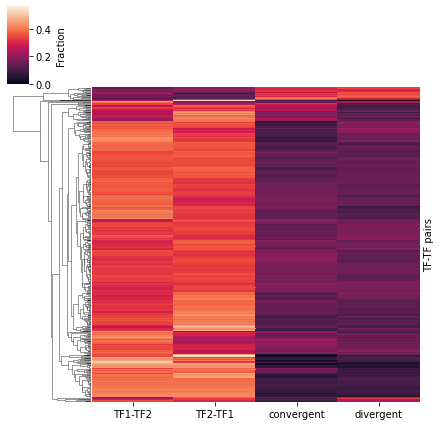

In [15]:
_ = selected.plot_heatmap()

----------

## In-depth look at preferential orientation

By sorting the selected co-occurring TF pairs, it is also possible to visualize the top pairs within each scenario as seen below.

### TFs specific in TF1-TF2 orientation

In [16]:
selected.sort_values("TF1-TF2", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
"(PATZ1, ZNF320)",PATZ1,ZNF320,56,0.517857,0.321429,0.053571,0.107143,0.212792,1.121316e-06
"(SP3, ZNF320)",SP3,ZNF320,71,0.507042,0.323944,0.112676,0.056338,0.206479,6.395727e-08
"(KLF9, ZNF341)",KLF9,ZNF341,77,0.506494,0.337662,0.090909,0.064935,0.210581,6.622678e-09
"(KLF1, KLF4)",KLF1,KLF4,82,0.487805,0.365854,0.036585,0.109756,0.212279,1.277030e-09
"(KLF1, KLF5)",KLF1,KLF5,134,0.477612,0.350746,0.067164,0.104478,0.197115,1.736812e-13


### TFs specific in TF2-TF2 orientation

In [17]:
selected.sort_values("TF2-TF1", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
"(KLF4, KLF5)",KLF4,KLF5,55,0.345455,0.563636,0.000000,0.090909,0.255140,2.505143e-09
"(EGR1, KLF9)",EGR1,KLF9,65,0.276923,0.553846,0.123077,0.046154,0.224135,1.586185e-08
"(KLF4, MAZ)",KLF4,MAZ,57,0.350877,0.526316,0.035088,0.087719,0.230253,6.587858e-08
"(E2F6, SP4)",E2F6,SP4,73,0.273973,0.493151,0.136986,0.095890,0.179089,3.467546e-06
"(EGR2, KLF9)",EGR2,KLF9,111,0.279279,0.486486,0.108108,0.126126,0.175367,6.655301e-09


### TFs specific in convergent orientation

In [18]:
selected.sort_values("convergent", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
"(ASCL1, WT1)",ASCL1,WT1,51,0.137255,0.137255,0.411765,0.313725,0.136200,0.009963
"(THAP1, ZNF263)",THAP1,ZNF263,63,0.238095,0.238095,0.396825,0.126984,0.111017,0.025355
"(SP1, ZFX)",SP1,ZFX,66,0.136364,0.136364,0.378788,0.348485,0.131798,0.003254
"(PATZ1, ZFX)",PATZ1,ZFX,62,0.161290,0.080645,0.370968,0.387097,0.152730,0.000597
"(NHLH1, SP1)",NHLH1,SP1,66,0.136364,0.318182,0.348485,0.196970,0.100122,0.047281


### TFs specific in divergent orientation

In [19]:
selected.sort_values("divergent", ascending=False).head()

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
"(PATZ1, ZFX)",PATZ1,ZFX,62,0.161290,0.080645,0.370968,0.387097,0.152730,0.000597
"(EGR2, MYF6)",EGR2,MYF6,65,0.169231,0.138462,0.307692,0.384615,0.116066,0.014709
"(MYF6, ZBTB17)",MYF6,ZBTB17,74,0.148649,0.148649,0.337838,0.364865,0.117549,0.006512
"(THAP1, ZNF341)",THAP1,ZNF341,83,0.228916,0.144578,0.265060,0.361446,0.089824,0.045271
"(WT1, ZFX)",WT1,ZFX,51,0.215686,0.098039,0.333333,0.352941,0.118055,0.036248
